<a id = 'top'></a>
<h3 style='text-align:center'> Customer segmentation using Clustering </h3>

- [Aim](#aim)
- [Data](#data)
    - [Loading the data](#load)
    - [Data wrangling](#clean)
       - [Handling null values](#nulls)
       - [Handling duplicated rows](#duplicates)
       - [Converting Categorical variables into Numeric variables](#convert)
- [Statistical Data Analysis](#eda)
- [Data Normalization and train test splitting](#norm)
-  **Model building**
  - [Clustering consumers in to  2 groups](#2groups)
  - [Clustering consumers in to  3 groups](#3groups)
  - [Clustering consumers in to  4 groups](#4groups)
  - [Clustering consumers in to  5 groups](#5groups)
  - [Clustering consumers in to  6 groups](#6groups)
  - [Clustering consumers in to  7 groups](#7groups)
  - [Clustering based on elbow method](#elbow)
- [Decision Tree classifier ](#dtree)
- [Comparing the performance of all clustering and report](#conclusions)
------------------------------------------------------------------------------------[BACK TO TOP](#top)

In [1]:
import numpy as np
import matplotlib.pyplot as plt , seaborn as sns,plotly.express as px
import pandas as pd
import tensorflow as tf
import sklearn
import time,math,random,os
plt.style.use('fivethirtyeight')

<a id = 'aim'></a>
### Aim
- Segementing the customers into various groups and 
- analysing how many fall into each group
- Identify the groups which include most of the customers
------------------------------------------------------------------------------------[BACK TO TOP](#top)

### Data
- Data has been sourced from kaggle [Link](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis)
- The data consists of 2216 records with each of 28 attributes 
- Data contains various details of customers to a company , like
  1. customer personal details(Dob,marital status,education etc..)
  2. customer's response to campaign
  3. customer's purchase behaviour 
  4. customer's interaction's with company (feedback and complaints)
------------------------------------------------------------------------------------[BACK TO TOP](#top)

<a id = 'load'></a>
#### Loading the data

In [2]:
df = pd.read_csv('datasets/clustering/marketing_campaign.csv',sep='\t')
df = df.drop(columns=['ID'])
print(df.shape)
df.head()

(2240, 28)


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.dtypes

Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

<a id = 'nulls'></a>
#### Handling nulls
- in our dataset nulls are very few , so we will just drop the records with nulls

In [4]:
print(df.isnull().sum())
df = df.dropna()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


<a id = 'dates'></a>
#### Handling date fields

In [5]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],format='%d-%m-%Y')

df['dayofweek'] = df['Dt_Customer'].dt.dayofweek
df['day']       = df['Dt_Customer'].dt.day
df['week']      = df['Dt_Customer'].dt.week
df['weekofyear'] = df['Dt_Customer'].dt.weekofyear
df['month']      = df['Dt_Customer'].dt.month
df['quarter']    = df['Dt_Customer'].dt.quarter
df['year']       = df['Dt_Customer'].dt.year
df = df.drop(columns=['Dt_Customer'])

C:\Users\dines\AppData\Local\Temp\ipykernel_13192\2604569762.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week']      = df['Dt_Customer'].dt.week
C:\Users\dines\AppData\Local\Temp\ipykernel_13192\2604569762.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['Dt_Customer'].dt.weekofyear


<a id = 'convert'></a>
#### Converting categorical fields into numerical fields

In [6]:
df['Education'] = df['Education'].astype('category').cat.codes
df['Marital_Status'] = df['Marital_Status'].astype('category').cat.codes

<a id = 'duplicates'></a>
#### Handling duplicated records

In [7]:
print(df.duplicated().sum()) # print the no of duplicated records in the df
df = df.drop_duplicates() # dropping the duplicated records

182


<a id = 'eda'></a>
### Statistical data analysis
- Finding the dependencies of various variables on each other and 
- Eliminating the variables that have least effect on the desired variables
- Year_Birth,Education,Marital_Status,Recency,Complain,Z_CostContact,Z_Revenue,day,
week,dayofweek,weekofyear,month,quarter,year have the least effect due to the comapaigns
- So we will be dropping them 
- 

<AxesSubplot:>

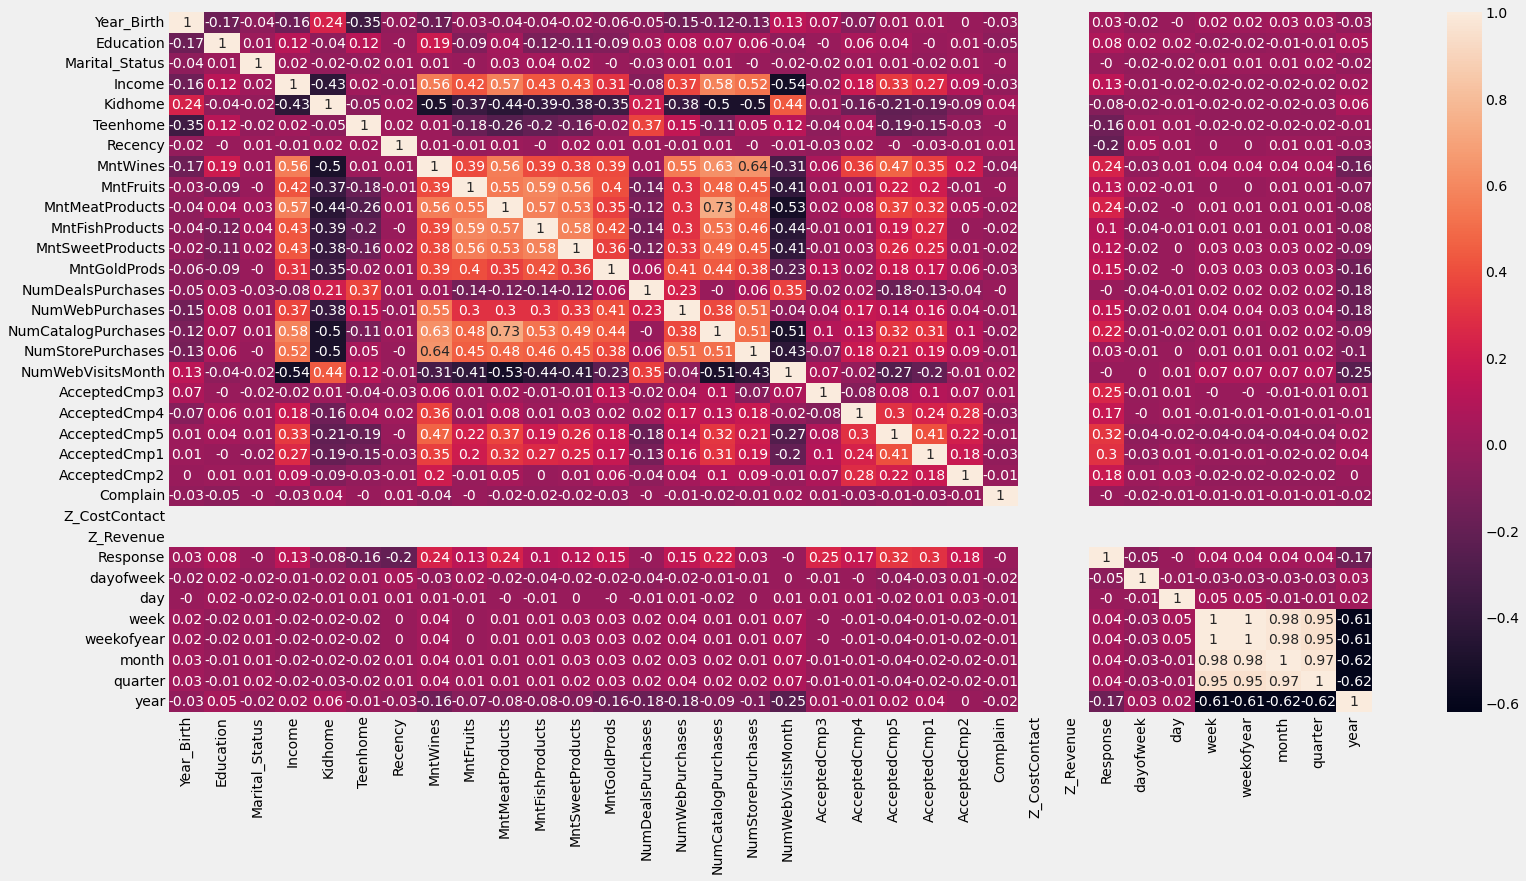

In [8]:
plt.figure(figsize=[24,12])
sns.heatmap(df.corr().round(2),annot=True,)

In [9]:
# dropping unnecssary columns
df = df.drop(columns=['Year_Birth','Education','Marital_Status','Recency',
                        'Complain','Z_CostContact','Z_Revenue','day','week','dayofweek','weekofyear',
                        'month','quarter','year'])
df.shape

(2034, 20)

<a id = 'norm'></a>
#### Normalizing the data

In [10]:
from sklearn.preprocessing import StandardScaler
norm = StandardScaler(with_mean=True,with_std=True)
norm.fit(df)
xdata = norm.transform(df)
xdata.shape

(2034, 20)

<a id -= 'outliers'></a>
#### Eliminating the outliers

In [11]:
# eliminating outliers
from sklearn.ensemble import IsolationForest
irf = IsolationForest(n_estimators = 5,contamination = .1)
irf.fit(xdata)
out = irf.predict(xdata)
print(pd.DataFrame(out).value_counts())
xdata = xdata[out==1]
xdata.shape

 1    1830
-1     204
dtype: int64


(1830, 20)

<a id = 'pca'></a>
#### Reducing the dimention's of the data
- To enable them to be plotted and Visualized

In [12]:
from sklearn.decomposition import PCA
pobj = PCA(n_components=2)
pobj.fit(xdata)
red = pobj.transform(xdata)
pobj.explained_variance_ratio_.sum()

0.4309440631294497

<a id = '2group'></a>
#### Clustering customers into 2 groups

         Count
Class 0   1105
Class 1    725


<AxesSubplot:>

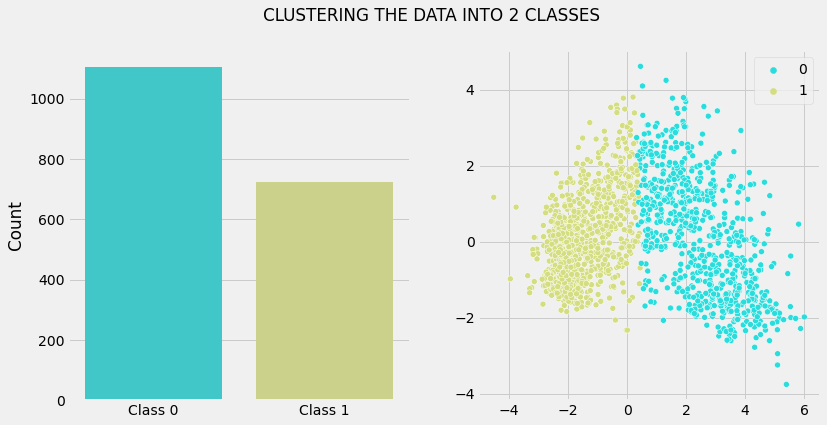

In [13]:
from sklearn.cluster import KMeans
n=2
kmeans = KMeans(n_clusters=n)
kmeans.fit(xdata)
yhat = kmeans.labels_
tdf =pd.DataFrame( pd.Series(yhat).value_counts())
tdf.columns = ['Count']
tdf.index = ['Class '+str(i) for i in range(len(tdf))]
print(tdf)
fig,axes = plt.subplots(1,2,figsize=[12,6])
fig.suptitle(f'CLUSTERING THE DATA INTO {n} CLASSES')
sns.barplot(x=tdf.index,y=tdf['Count'],ax=axes[0],palette='rainbow')
sns.scatterplot(x=red[:,0],y=red[:,1],hue=yhat,ax=axes[1],palette = 'rainbow')

<a id = '3group'></a>
#### Clustering customers into 3 groups

         Count
Class 0    935
Class 1    521
Class 2    374


<AxesSubplot:>

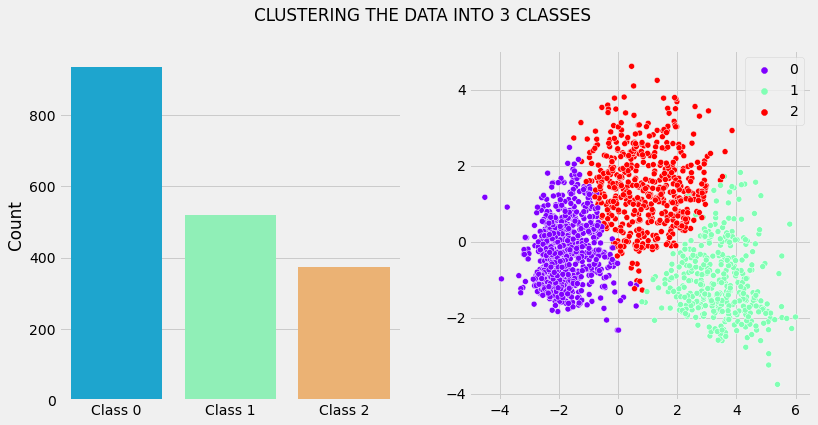

In [14]:
n=3
kmeans = KMeans(n_clusters=n)
kmeans.fit(xdata)
yhat = kmeans.labels_
tdf =pd.DataFrame( pd.Series(yhat).value_counts())
tdf.columns = ['Count']
tdf.index = ['Class '+str(i) for i in range(len(tdf))]
print(tdf)
fig,axes = plt.subplots(1,2,figsize=[12,6])
fig.suptitle(f'CLUSTERING THE DATA INTO {n} CLASSES')
sns.barplot(x=tdf.index,y=tdf['Count'],ax=axes[0],palette='rainbow')
sns.scatterplot(x=red[:,0],y=red[:,1],hue=yhat,ax=axes[1],palette = 'rainbow')

<a id = '4group'></a>
#### Clustering customers into 4 groups

         Count
Class 0    913
Class 1    461
Class 2    344
Class 3    112


<AxesSubplot:>

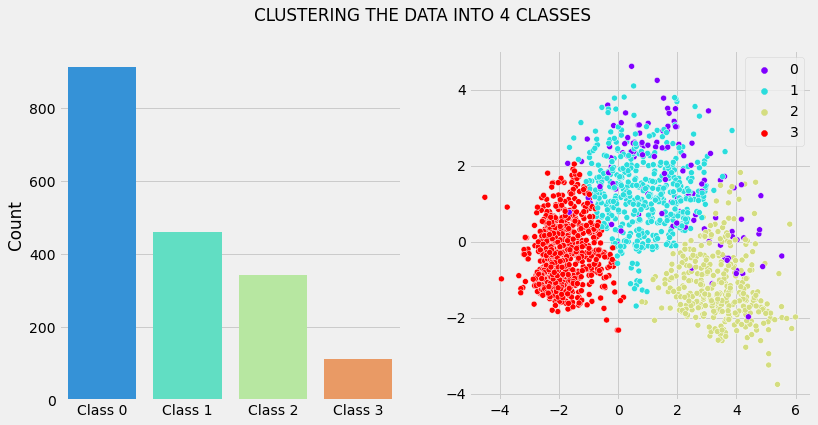

In [15]:
n=4
kmeans = KMeans(n_clusters=n)
kmeans.fit(xdata)
yhat = kmeans.labels_
tdf =pd.DataFrame( pd.Series(yhat).value_counts())
tdf.columns = ['Count']
tdf.index = ['Class '+str(i) for i in range(len(tdf))]
print(tdf)
fig,axes = plt.subplots(1,2,figsize=[12,6])
fig.suptitle(f'CLUSTERING THE DATA INTO {n} CLASSES')
sns.barplot(x=tdf.index,y=tdf['Count'],ax=axes[0],palette='rainbow')
sns.scatterplot(x=red[:,0],y=red[:,1],hue=yhat,ax=axes[1],palette = 'rainbow')

<a id = '5group'></a>
#### Clustering customers into 5 groups

         Count
Class 0    834
Class 1    439
Class 2    337
Class 3    111
Class 4    109


<AxesSubplot:>

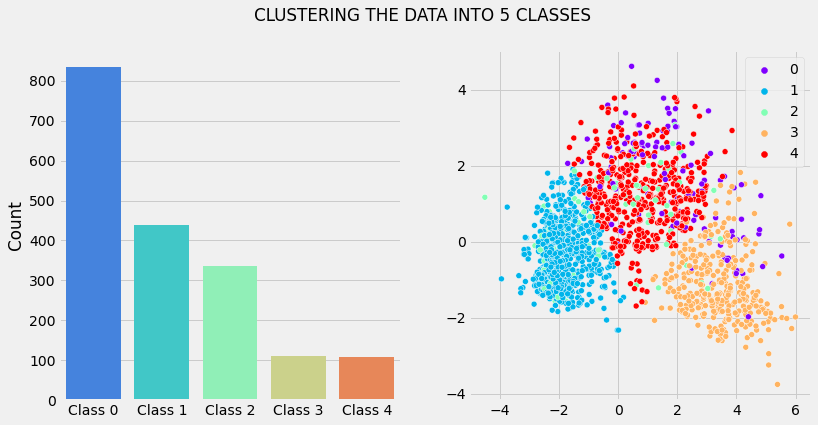

In [16]:
n = 5
kmeans = KMeans(n_clusters=n)
kmeans.fit(xdata)
yhat = kmeans.labels_
tdf =pd.DataFrame( pd.Series(yhat).value_counts())
tdf.columns = ['Count']
tdf.index = ['Class '+str(i) for i in range(len(tdf))]
print(tdf)
fig,axes = plt.subplots(1,2,figsize=[12,6])
fig.suptitle(f'CLUSTERING THE DATA INTO {n} CLASSES')
sns.barplot(x=tdf.index,y=tdf['Count'],ax=axes[0],palette='rainbow')
sns.scatterplot(x=red[:,0],y=red[:,1],hue=yhat,ax=axes[1],palette = 'rainbow')

<a id = '6group'></a>
#### Clustering customers into 6 groups

         Count
Class 0    831
Class 1    429
Class 2    295
Class 3    108
Class 4    102
Class 5     65


<AxesSubplot:>

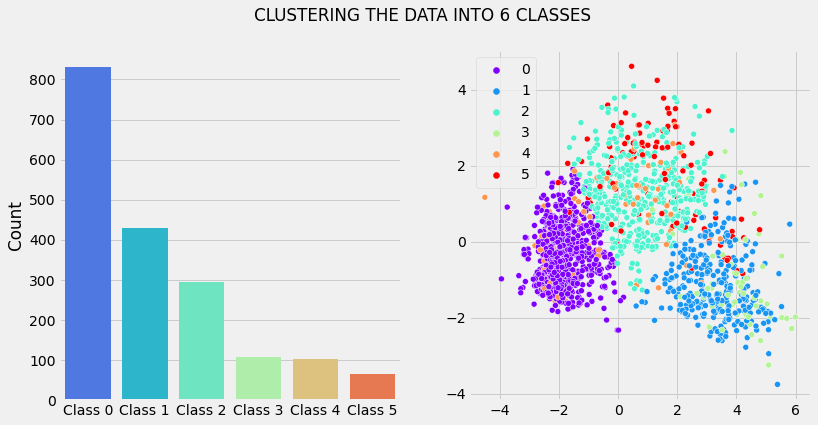

In [17]:
n = 6
kmeans = KMeans(n_clusters=n)
kmeans.fit(xdata)
yhat = kmeans.labels_
tdf =pd.DataFrame( pd.Series(yhat).value_counts())
tdf.columns = ['Count']
tdf.index = ['Class '+str(i) for i in range(len(tdf))]
print(tdf)
fig,axes = plt.subplots(1,2,figsize=[12,6])
fig.suptitle(f'CLUSTERING THE DATA INTO {n} CLASSES')
sns.barplot(x=tdf.index,y=tdf['Count'],ax=axes[0],palette='rainbow')
sns.scatterplot(x=red[:,0],y=red[:,1],hue=yhat,ax=axes[1],palette = 'rainbow')

<a id = '7group'></a>
#### Clustering customers into 7 groups

        Count
Class0    482
Class1    420
Class2    365
Class3    283
Class4    107
Class5     91
Class6     82


<AxesSubplot:>

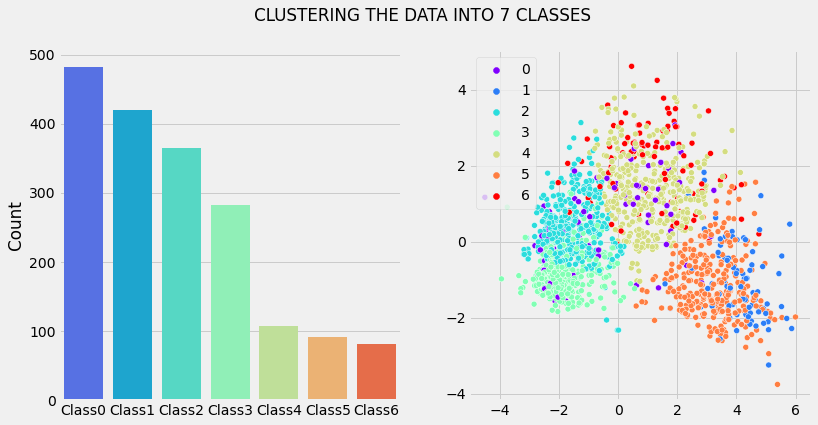

In [18]:
n = 7
kmeans = KMeans(n_clusters=n)
kmeans.fit(xdata)
yhat = kmeans.labels_
tdf =pd.DataFrame( pd.Series(yhat).value_counts())
tdf.columns = ['Count']
tdf.index = ['Class'+str(i) for i in range(len(tdf))]
print(tdf)
fig,axes = plt.subplots(1,2,figsize=[12,6])
fig.suptitle(f'CLUSTERING THE DATA INTO {n} CLASSES')
sns.barplot(x=tdf.index,y=tdf['Count'],ax=axes[0],palette='rainbow')
sns.scatterplot(x=red[:,0],y=red[:,1],hue=yhat,ax=axes[1],palette = 'rainbow')

<a id = 'elbow'></a>
### Elbow method
- finding the best value of k to cluster the datainto and clustering using that value of k

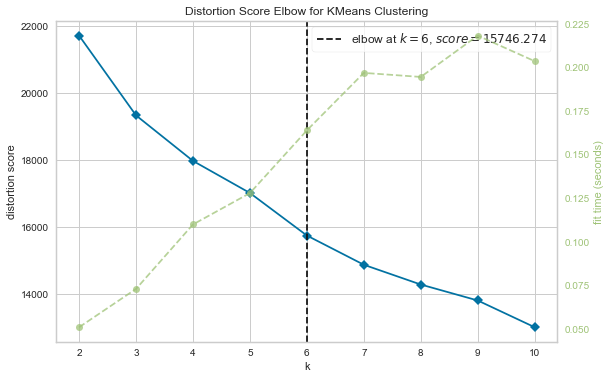

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
elbow = KElbowVisualizer(KMeans(), k=10)
elbow.fit(xdata)
elbow.show()

         Count
Class 0    837
Class 1    435
Class 2    337
Class 3    112
Class 4    109


<AxesSubplot:>

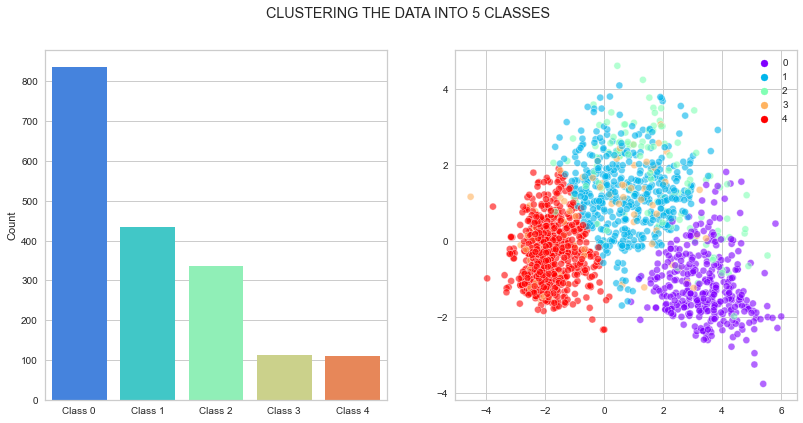

In [20]:
n = 5
kmeans = KMeans(n_clusters=n)
kmeans.fit(xdata)
yhat = kmeans.labels_
tdf =pd.DataFrame( pd.Series(yhat).value_counts())
tdf.columns = ['Count']
tdf.index = ['Class '+str(i) for i in range(len(tdf))]
print(tdf)
fig,axes = plt.subplots(1,2,figsize=[12,6])
fig.suptitle(f'CLUSTERING THE DATA INTO {n} CLASSES')
sns.barplot(x=tdf.index,y=tdf['Count'],ax=axes[0],palette='rainbow')
sns.scatterplot(x=red[:,0],y=red[:,1],hue=yhat,ax=axes[1],palette = 'rainbow',alpha=0.6)

<a id = 'dtree'></a>
### Decision tree classifier
- We will train a decision tree classifier with the customer data as the input features and the clustered category as the target label
- The role of this model is to understand why or how each point is categorised into its corresponding cluster
- This can be done by fitting (even over fitting the data is acceptable as this model is not used for 
prediction but understanding how the data is clustered) into the model and then visualizing the decision tree constructed

[Text(0.47259615384615383, 0.9375, 'X[3] <= -0.571\ngini = 0.693\nsamples = 1830\nvalue = [337, 435, 112, 109, 837]'),
 Text(0.19230769230769232, 0.8125, 'X[14] <= 1.624\ngini = 0.208\nsamples = 871\nvalue = [4, 33, 4, 58, 772]'),
 Text(0.17692307692307693, 0.6875, 'X[5] <= -0.447\ngini = 0.097\nsamples = 813\nvalue = [4, 33, 4, 0, 772]'),
 Text(0.09230769230769231, 0.5625, 'X[15] <= 1.597\ngini = 0.029\nsamples = 755\nvalue = [1, 6, 4, 0, 744]'),
 Text(0.06153846153846154, 0.4375, 'X[0] <= 14.191\ngini = 0.019\nsamples = 750\nvalue = [1, 6, 0, 0, 743]'),
 Text(0.046153846153846156, 0.3125, 'X[8] <= 4.788\ngini = 0.016\nsamples = 749\nvalue = [0, 6, 0, 0, 743]'),
 Text(0.03076923076923077, 0.1875, 'X[4] <= 0.747\ngini = 0.013\nsamples = 748\nvalue = [0, 5, 0, 0, 743]'),
 Text(0.015384615384615385, 0.0625, 'gini = 0.011\nsamples = 747\nvalue = [0, 4, 0, 0, 743]'),
 Text(0.046153846153846156, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0]'),
 Text(0.06153846153846154, 0.1875, 

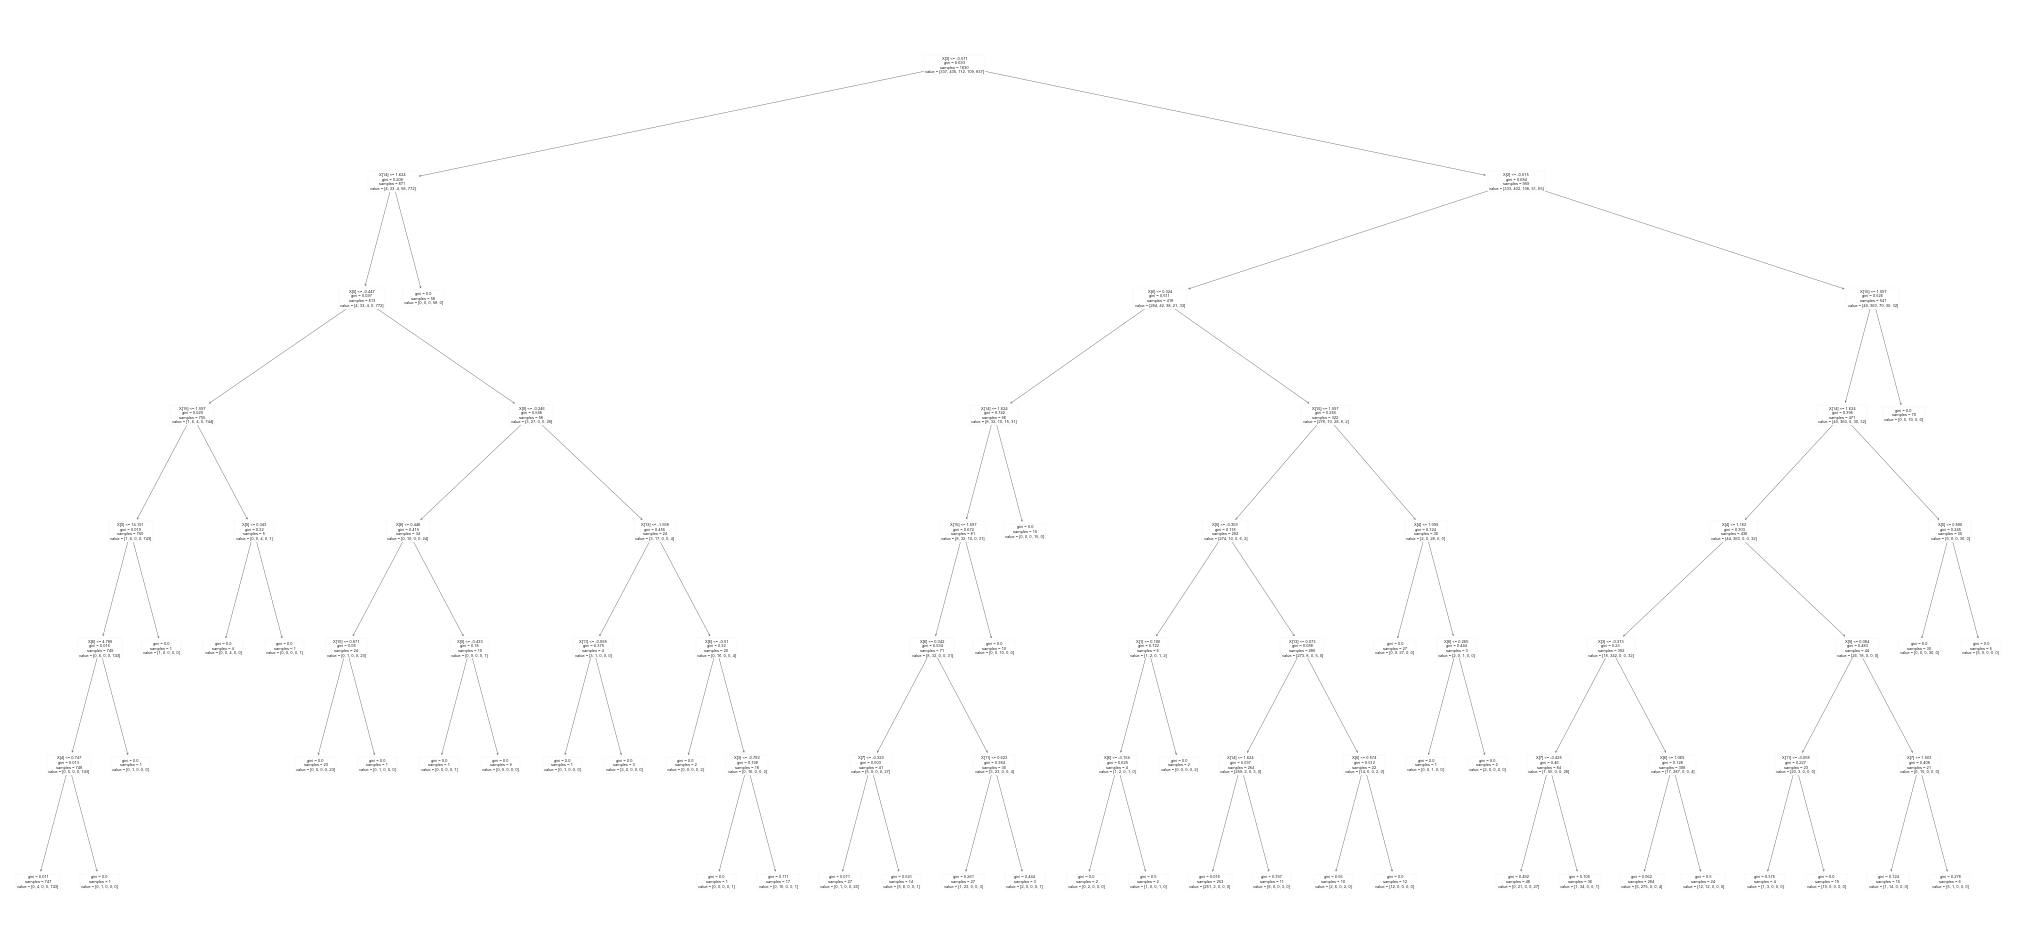

In [21]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
dtree = DecisionTreeClassifier(max_depth=7)
dtree.fit(xdata,yhat)
plt.figure(figsize=[32,16]) # increase the size of the image and zoom it in order for it to be viewable
plot_tree(dtree)


<a id = 'conclusions'></a>
#### Conclusions and Report
1. Clustering the data into 5 groups best explains our data in terms of inertia 
2. Clustering the data into 4 groups best explains our data visually
3. Most of the features of the customer like      Year_Birth,Education,Marital_Status,Recency,Complain,Z_CostContact,Z_Revenue,day,
week,dayofweek,weekofyear,month,quarter,year had the least effect on their response to companies
add campaign's
------------------------------------------------------------------------------------[BACK TO TOP](#top)